<a href="https://colab.research.google.com/github/fares-mldev/uns-pdi2021/blob/main/tp5/PDI_TP5_FFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Práctico TP5 (Transformada de Fourier 2D)

Armar un aplicativo como el mostrado en este apunte, que permita la generación de TFs
directas e inversas de imágenes. Probarlo con diferentes figuras geométricas y tratar de reproducir algunos de los
ejemplos vistos aquí. Generar otros ejemplos (elipses, rombos, dos o más objetos, etc.). Guardar el espectro de amplitud de una imagen en un bitmap, luego editarlo con un
editor gráfico, y finalmente aplicar la transformada inversa (preservando la fase) para ver
los efectos. 



In [150]:
#@title Imports

# Import numpy
import numpy as np

# Import imageio
import imageio as iio

# Import matplotlib
import matplotlib.pyplot as plt

In [151]:
#@title Image utils

# Images URL list 
url_dict = {}
url_dict["square"] = "https://github.com/fares-mldev/uns-pdi2021/raw/main/tp5/img/square.jpg"
url_dict["circle"] = "https://github.com/fares-mldev/uns-pdi2021/raw/main/tp5/img/circle.jpg"
url_dict["triangle"] = "https://github.com/fares-mldev/uns-pdi2021/raw/main/tp5/img/triangle.jpg"
url_dict["elipse"] = "https://github.com/fares-mldev/uns-pdi2021/raw/main/tp5/img/elipse.jpg"
url_dict["rhombus"] = "https://github.com/fares-mldev/uns-pdi2021/raw/main/tp5/img/rhombus.jpg"
url_dict["h_lines"] = "https://github.com/fares-mldev/uns-pdi2021/raw/main/tp5/img/h_lines.jpg"
url_dict["v_lines"] = "https://github.com/fares-mldev/uns-pdi2021/raw/main/tp5/img/v_lines.jpg"
url_dict["d_lines"] = "https://github.com/fares-mldev/uns-pdi2021/raw/main/tp5/img/d_lines.jpg"
url_dict["pattern1"] = "https://github.com/fares-mldev/uns-pdi2021/raw/main/tp5/img/pattern1.jpg"
url_dict["pattern2"] = "https://github.com/fares-mldev/uns-pdi2021/raw/main/tp5/img/pattern2.jpg"

def get_image(image: str) -> np.array:
    '''
    Downloads specified image from the web and returns it as a numpy array
    '''
    # Read image from file
    img = iio.imread(url_dict[image])

    # Return image
    return np.asarray(img)

# RGB to YIQ space transformation matrix
rgb_to_yiq = [[0.299, 0.587, 0.114],
              [0.595716, -0.274453, -0.321263],
              [0.211456, -0.522591, 0.311135]]

# YIQ to RGB space transformation matrix
yiq_to_rgb = [[1, 0.9663, 0.6210],
              [1, -0.2721, -0.6474],
              [1, -1.1070, 1.7046]]

def plot_img(img: np.array, ax = None):
  '''
  Plots image using matplotlib 
  '''

  # If no axis sprecified get handle
  if ax is None:
    ax = plt.gca()

  # Show image
  ax.imshow(img)

def describe_img(img: np.array):
  '''
  Prints image properties
  '''
  print("Image shape (height,width,channels):", img.shape)
  print("Element type:", img.dtype)
  print("Total number of pixels:",img.size)
  print("Pixels per channel:", int(img.size/img.shape[2]))
  print("min-max value of channel 0:",img[:,:,0].min(),img[:,:,0].max())
  print("min-max value of channel 1:",img[:,:,1].min(),img[:,:,1].max())
  print("min-max value of channel 2:",img[:,:,2].min(),img[:,:,2].max())
  
def convert_rgb2yiq(img_rgb: np.array) -> np.array:
  '''
  Converts an RGB image to YIQ space
  '''
  
  # Normalize image
  img_rgb_n = img_rgb.astype(np.float64) / 255.0  
  
  # Apply transformation
  img_yiq = np.dot(img_rgb_n,rgb_to_yiq)
  
  # Clip to limits

  # Return YIQ image
  return img_yiq

def convert_yiq2rgb(img_yiq: np.array) -> np.array:
  '''
  Converts an YIQ image to RGB space
  '''

  # Apply transformation
  img_rgb_n= np.dot(img_yiq,yiq_to_rgb)
  
  # Clip image 
  img_rgb = img_rgb_n.clip(0,1) * 255.0
  
  # Return RGB image
  return img_rgb.astype(np.uint8) 

def get_y(im):
  '''
  Gets the luminance (Y) channel of an image
  '''
  return convert_rgb2yiq(im)[:,:,0]

def get_fft(im):
  '''
  Gets the magnitude and phase channels on an image
  '''
  fc = np.fft.fftshift(np.fft.fft2(im))

  mag = np.abs(fc)
  phase = np.angle(fc)

  return mag,phase
  
def plot_fft(im, desc= ''):
  '''
  Plots an image, together with its fft magnitude and phase
  '''
  fig, axes = plt.subplots(1,3)
  fig.set_size_inches(30,10)
  mag, phase = get_fft(im)

  axes[0].imshow(im, cmap = 'gray')
  axes[0].set_title(desc)
  axes[1].imshow(np.power(mag,0.2))
  axes[1].set_title('fft magnitude')
  axes[2].imshow(phase)
  axes[2].set_title('fft phase')
  


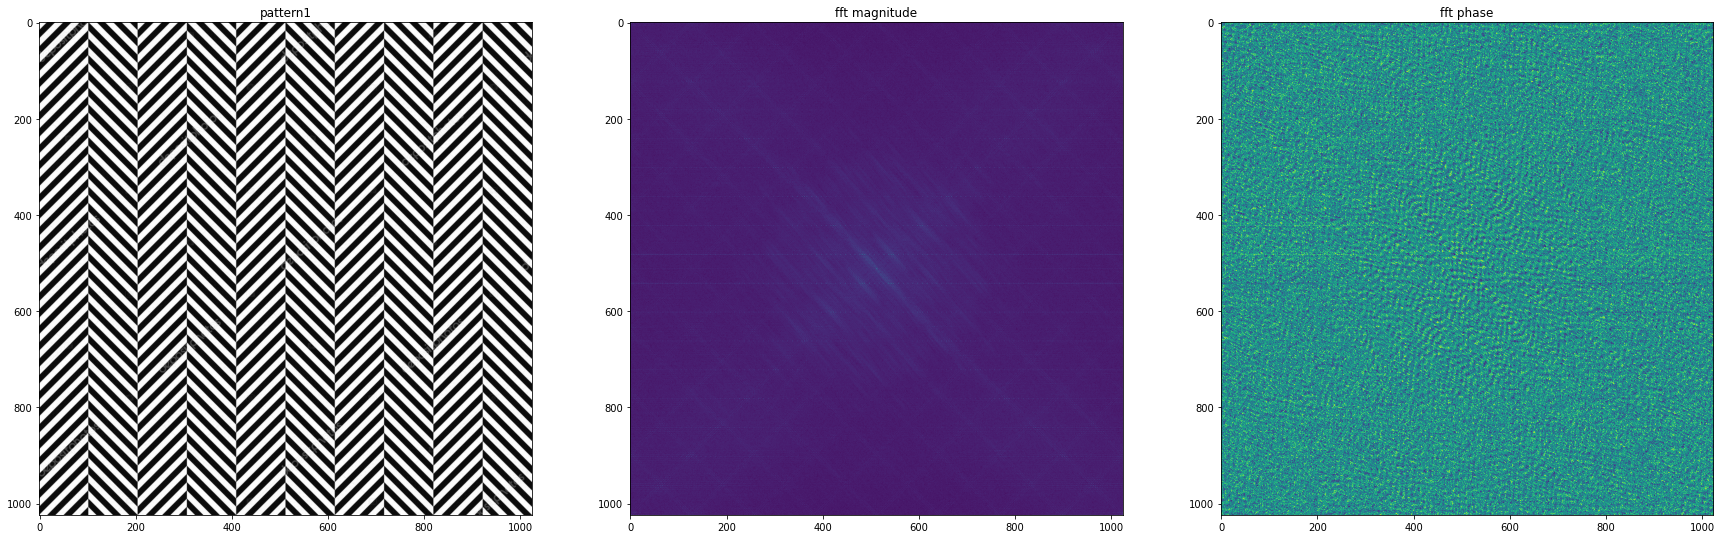

In [152]:
#@title Seleccionar imagen { run: "auto" }
#@markdown Seleccionar imagen.
image = "pattern1" #@param ["square","circle","triangle", 'elipse', 'rhombus', "h_lines","v_lines","d_lines","pattern1","pattern2"]
im = get_image(image)
im_y = get_y(im)
plot_fft(im_y, image)

# Write results to file
fn = f'fft_{image:s}'

# Export results
fig = plt.gcf()
fig.savefig(fn)



Observamos los distintos espectros 2d. Las imagenes sin una direccionabilidad definida (`circle`) presentan un espectro de magnitud homogeneo en todas las direcciones. En la `elipse` se distingue una ligera compresión del espectro en  lo largo de la dirección más grande.

En el caso del cuadrado (`square`) y el rombo (`rhombus`) se distinguen dos direcciones de cambio muy definidas. en el primer caso se ubican a 90 grados, mientras que en rombo a un ángulo distinto (dado por los ángúlos de sus lados).

El triángulo (`triangle`) presenta tres direcciones marcadas de cambio.

Los patrones de líneas horizontales (`h_lines`), verticales (`v_lines`) y diagonales (`d_lines`) muestran una sola dirección marcada, a lo largo de la cual la energia se concentra en determinados puntos cuya separación está dada 
por la periodicidad de las líneas.

El patrón de líneas mixtas (`pattern1`) muestra cierta tendencia en las direcciones diagonales, pero de forma mucho menos marcado que en las líneas diagonales puras.

El patrón de líneas hexagonales (`pattern2`) muestra claramente seis direcciones marcadas.

In [ ]:
#@title Sumar imagenes { run: "auto" }
#@markdown Seleccionar imagenes
image1 = "triangle" #@param ["square","circle","triangle"]
image2 = "d_lines" #@param ["h_lines","v_lines","d_lines"]

im1 = get_image(image1)[0:480,0:480]
im2 = get_image(image2)[0:480,0:480]

im = get_y(im1) + get_y(im2)
plot_fft(im,f'{image1:s} + {image2:s}')

# Write results to file
fn = f'fft_{image1:s}_plus_{image2:s}'

# Export results
fig = plt.gcf()
fig.savefig(fn)


Al sumar dos imágenes de luminancia se observa como los espectros de ambas imágenes aparecen superpuestos, debido a la propiedad de linealidad de la transformada de Fourier. 

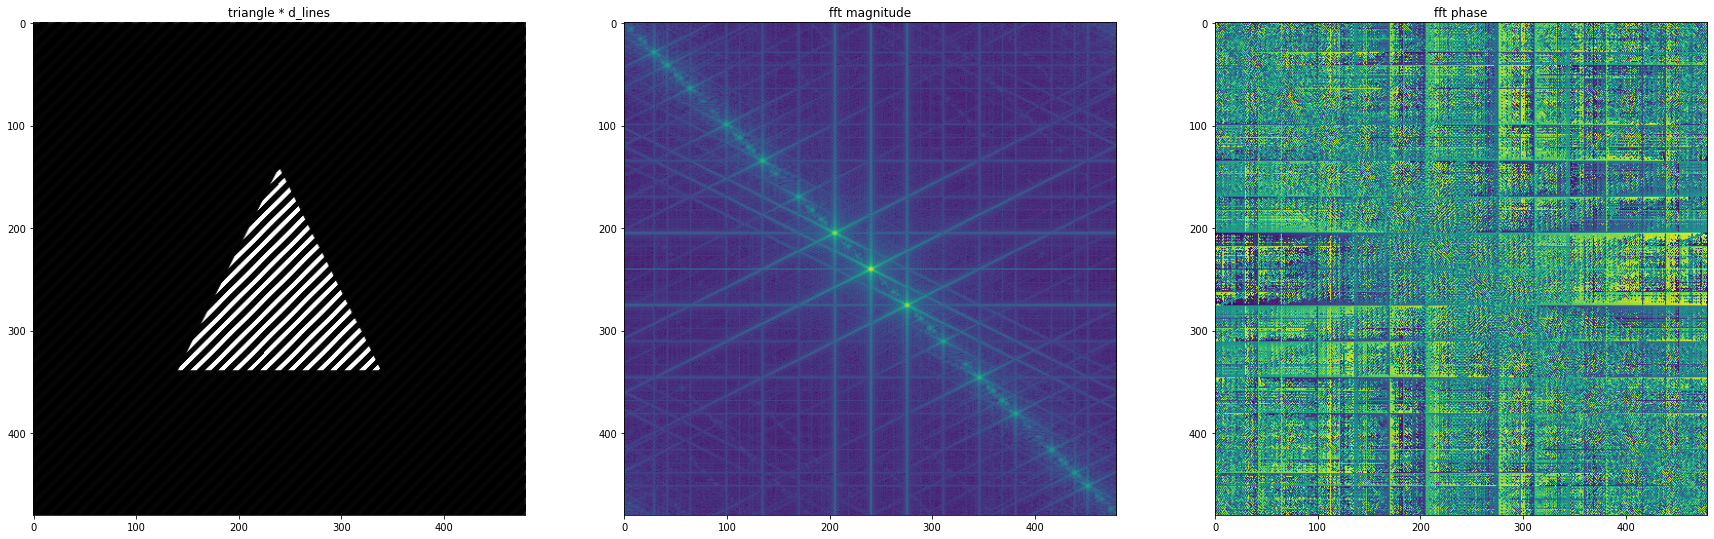

In [143]:
#@title Multiplicar imagenes { run: "auto" }
#@markdown Seleccionar imagenes
image1 = "triangle" #@param ["square","circle","triangle"]
image2 = "d_lines" #@param ["h_lines","v_lines","d_lines"]

im1 = get_image(image1)[0:480,0:480]
im2 = get_image(image2)[0:480,0:480]

im = np.multiply(get_y(im1),get_y(im2))

plot_fft(im,f'{image1:s} * {image2:s}')

# Write results to file
fn = f'fft_{image1:s}_mul_{image2:s}'

# Export results
fig = plt.gcf()
fig.savefig(fn)

Al multiplicar dos imágenes de luminancia se observa como los espectros de ambas imágenes aparecen repetidos múltiples veces. Lo que ocurre es que los espectros se convolucionan. Como una de las imágenes es periódica, su espectro tiene una serie de puntos de mayor energía (armónicos). Se observa como el espectro de la imágen aperiódica se repite en cada uno de estos puntos. 